<a href="https://colab.research.google.com/github/ParsaMohammadpour/polynomial-regression/blob/main/polynomial-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


First we import libraries that we are going to use

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Here we define a class that can calculate polynomial regression with getting train data, target column, dimensions, epoch & learning rate.
In this class we define some function for this job.

#normalize:#
In here, first we calculate train data's power that are determined in the dimension list and put the resluts in a np.array object.
Then we calculate mean and var for all columns in we calculated in the prevoius part and store them in a np.array object.(In case that we can use them on the test data)
And we also find the normalized (standardized) data by this var and mean arrays.

#gradian_function:#
This gradian function is exactly the same as linear gradian_function.

#cost_function_simplified:#
This cost function is exactly the same as linear cost_function.

#PR_GD:#
Here we fist normalize data using the function normalize().
then we make random weights vector by using random.random() function. But we multiplies numbers by 1000000000 because when we normalize data, data range (specialy for powers more than 1 or 2) is very low, so we do this just to make the this weights acceptable. (If we don't do this, our PR_GD function, can only find the bias parameter (w of the 0 power of the traing data) correctly, and it won't fluctuate in an appropriate order, it almost fluctuate in 0.00001)
Then we run the algorithm epoch times.

#test:#
Here we use the weight vector that we figured in the previous part and the test data (after we calculated power of test data by the dimensions list and normalizing them using mean & var narrays) and we draw plots of the result.

In [ ]:
class Polynomial_Regression:
  def __init__(self, train, target, dimensions, learning_rate, epoch):
    self.train = train.to_numpy()
    self.target = target.to_numpy()
    self.dimensions = dimensions
    self.learning_rate = learning_rate
    self.epoch = epoch

  # def normalize(self):
  #   self.mean = np.mean(self.train)
  #   self.var = np.var(self.train)
  #   self.x = (self.train - self.mean) / self.var
  #   self.x = np.array([(np.array(self.x) ** x) for x in self.dimensions])
  #   self.x = np.transpose(self.x)

  def normalize(self):
    self.x = np.array([self.train ** dim for dim in dimensions])
    self.mean = np.array([np.mean(i) for i in self.x])
    self.var = np.array([np.var(i) for i in self.x])
    self.x = np.array([(self.x[i] - self.mean[i]) / self.var[i] if self.var[i] != 0 else self.x[i] for i in range(len(self.x))])
    self.x = np.transpose(self.x)

  def gradian_function(self, predict, w):
    return np.dot(predict - self.target, self.x) / len(self.x)

  def cost_function_simplified(self, predicts):
    return np.sum((predicts - self.target) ** 2) / (2 * len(self.target))

  def PR_GD(self):
    self.normalize()
    w = np.array([random.random() * (10 ** (9)) if x != 0 else random.random() for x in self.dimensions])
    print('Random Weights: ', w)
    predict = np.dot(self.x, w)
    costs = []
    cost = self.cost_function_simplified(predict)
    costs.append(cost)
    for i in range(self.epoch):
      gradian = self.gradian_function(predict, w)
      # print('gradian')
      # print(gradian)
      w = w - (self.learning_rate * gradian)
      predict = np.dot(self.x, w)
      cost = self.cost_function_simplified(predict)
      costs.append(cost)
    print('Final Cost: ', cost)
    plt.plot([i for i in range(len(costs))], costs)
    plt.xlabel('Test Number')
    plt.ylabel('Cost Function')
    plt.title('Cost-Function-Result')
    plt.savefig("Cost-Function-Image.png")
    plt.show()
    return w

  def test(self, w, test, correct):
    # test = np.array((test - self.mean) / self.var)
    test = np.array([(test ** x) for x in self.dimensions])
    test = np.array([np.array((test[i] - self.mean[i]) / self.var[i]) if self.var[i] != 0 else test[i] for i in range(len(test))])
    test = np.transpose(test)
    print('test[0]: ', test[0])
    predict = np.dot(test, weights)
    print('Predict:')
    print(predict)
    # plt.scatter([x for x in test_copy], np.array(correct), color='b')
    # plt.scatter([x for x in test_copy], np.array(predict), color='r')
    plt.plot([x for x in range(len(correct))], np.array(correct), color='b')
    plt.plot([x for x in range(len(predict))], np.array(predict), color='r')
    plt.xlabel('Number')
    # plt.xlabel('Mileage')
    plt.ylabel('Price/Predict')
    # dff = pd.read_csv('/content/drive/MyDrive/ML_HW2_Q2/data.csv')
    # lable = dff.iloc[len(dff) - 100:, :]
    # lable = np.array(lable['Mileage'])
    # plt.scatter(lable, np.array(correct), color='b')
    # plt.scatter(lable, np.array(predict), color='r')
    # plt.savefig('Predict-Terget*Mileage.png')
    plt.show()
    mins = [min(correct), min(predict)]
    maxs = [max(correct), max(predict)]
    plt.plot([min(mins), max(maxs)], [min(mins), max(maxs)])
    plt.scatter(predict, correct)
    plt.xlabel('Predict')
    plt.ylabel('Price')
    # plt.savefig('Terget*Predict.png')
    plt.show()

Random Weights:  [6.63072699e-01 4.30529943e+08 2.47485910e+08 3.44901455e+08
 6.15286509e+06]
Final Cost:  143489233.8482047


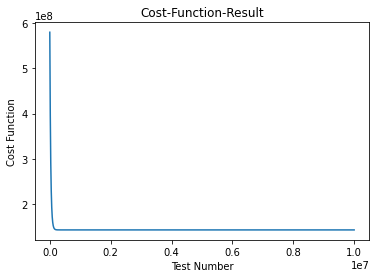

weights:  [2.95215325e+04 4.30529895e+08 2.47485910e+08 3.44901455e+08
 6.15286509e+06]
test[0]:  [ 1.00000000e+00 -7.76038054e-06 -9.34515623e-12 -2.99790055e-18
  9.40110270e-20]
Predict:
[26180.45437275 27951.3887956  27962.68045578 22591.40842205
 28464.77263812 28083.17639143 39125.33973309 28771.19427368
 33364.5803235  22800.38143234 22268.74543545 44889.50341403
 34623.0593508  33675.1783864  24362.03323484 49922.33941135
 27216.96685388 24156.30849706 24106.34677528 24278.35121724
 23646.32770689 25952.61034249 20861.30995347 26528.48497282
 24422.20385395 21966.65492485 27726.48367472 21564.02226319
 28002.89732769 22322.57415968 35521.75200791 24452.83054445
 29249.92974902 28106.22375274 22057.29754567 39266.40820744
 28625.64012932 43080.82580353 33845.17204893 28370.57234808
 26747.35755262 35720.36154261 38288.98312543 23406.57332014
 23416.78221656 24802.25324322 28463.07115505 25667.3799368
 24069.22351458 25386.32590135 41984.91541786 44571.01651512
 27276.2093981  20

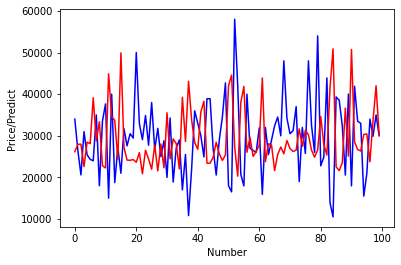

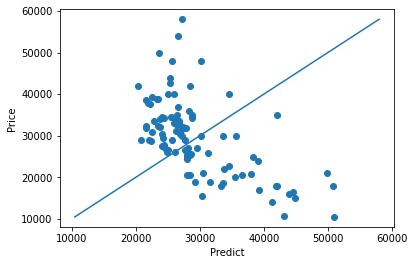

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML_HW2_Q2/data.csv')
train_limit_number = len(df) - 100
test = df.iloc[train_limit_number:, :]
df = df.iloc[:train_limit_number, :]
dimensions = list(range(5))
train = df['Mileage']
target = df['Price']
# learning_rate = 0.000017
learning_rate = 0.0000170007
epoch = 10000000
pr = Polynomial_Regression(train, target, dimensions, learning_rate, epoch)
weights = pr.PR_GD()
print('weights: ', weights)
pr.test(weights, test['Mileage'].to_numpy(), test['Price'].to_numpy())